In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
train_df = pd.read_csv('chemin/vers/train.csv')
client_df = pd.read_csv('chemin/vers/client.csv')
electricity_prices_df = pd.read_csv('chemin/vers/electricity_prices.csv')
gas_prices_df = pd.read_csv('chemin/vers/gas_prices.csv')

In [27]:
train_df = pd.read_csv('train.csv')
client_df = pd.read_csv('client.csv')
electricity_prices_df = pd.read_csv('electricity_prices.csv')
gas_prices_df = pd.read_csv('gas_prices.csv')

In [28]:
print("Train Data:")
print(train_df.head())

Train Data:
   county  is_business  product_type  target  is_consumption  \
0       0            0             1   0.713               0   
1       0            0             1  96.590               1   
2       0            0             2   0.000               0   
3       0            0             2  17.314               1   
4       0            0             3   2.904               0   

              datetime  data_block_id  row_id  prediction_unit_id  
0  2021-09-01 00:00:00              0       0                   0  
1  2021-09-01 00:00:00              0       1                   0  
2  2021-09-01 00:00:00              0       2                   1  
3  2021-09-01 00:00:00              0       3                   1  
4  2021-09-01 00:00:00              0       4                   2  


In [29]:
print(client_df.head())

   product_type  county  eic_count  installed_capacity  is_business  \
0             1       0        108              952.89            0   
1             2       0         17              166.40            0   
2             3       0        688             7207.88            0   
3             0       0          5              400.00            1   
4             1       0         43             1411.00            1   

         date  data_block_id  
0  2021-09-01              2  
1  2021-09-01              2  
2  2021-09-01              2  
3  2021-09-01              2  
4  2021-09-01              2  


In [30]:
print(electricity_prices_df.head())

         forecast_date  euros_per_mwh          origin_date  data_block_id
0  2021-09-01 00:00:00          92.51  2021-08-31 00:00:00              1
1  2021-09-01 01:00:00          88.90  2021-08-31 01:00:00              1
2  2021-09-01 02:00:00          87.35  2021-08-31 02:00:00              1
3  2021-09-01 03:00:00          86.88  2021-08-31 03:00:00              1
4  2021-09-01 04:00:00          88.43  2021-08-31 04:00:00              1


In [31]:
print(gas_prices_df.head())

  forecast_date  lowest_price_per_mwh  highest_price_per_mwh origin_date  \
0    2021-09-01                 45.23                  46.32  2021-08-31   
1    2021-09-02                 45.62                  46.29  2021-09-01   
2    2021-09-03                 45.85                  46.40  2021-09-02   
3    2021-09-04                 46.30                  46.80  2021-09-03   
4    2021-09-05                 46.30                  46.58  2021-09-04   

   data_block_id  
0              1  
1              2  
2              3  
3              4  
4              5  


In [32]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018352 entries, 0 to 2018351
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   county              int64  
 1   is_business         int64  
 2   product_type        int64  
 3   target              float64
 4   is_consumption      int64  
 5   datetime            object 
 6   data_block_id       int64  
 7   row_id              int64  
 8   prediction_unit_id  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 138.6+ MB
None


In [33]:
print(train_df.describe())

             county   is_business  product_type        target  is_consumption  \
count  2.018352e+06  2.018352e+06  2.018352e+06  2.017824e+06       2018352.0   
mean   7.297034e+00  5.368261e-01  1.898927e+00  2.748556e+02             0.5   
std    4.780990e+00  4.986421e-01  1.081766e+00  9.095024e+02             0.5   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00             0.0   
25%    3.000000e+00  0.000000e+00  1.000000e+00  3.780000e-01             0.0   
50%    7.000000e+00  1.000000e+00  2.000000e+00  3.113300e+01             0.5   
75%    1.100000e+01  1.000000e+00  3.000000e+00  1.802062e+02             1.0   
max    1.500000e+01  1.000000e+00  3.000000e+00  1.548027e+04             1.0   

       data_block_id        row_id  prediction_unit_id  
count   2.018352e+06  2.018352e+06        2.018352e+06  
mean    3.218746e+02  1.009176e+06        3.304538e+01  
std     1.826343e+02  5.826482e+05        1.959059e+01  
min     0.000000e+00  0.000000e+00        

In [34]:
print(train_df.isnull().sum())

county                  0
is_business             0
product_type            0
target                528
is_consumption          0
datetime                0
data_block_id           0
row_id                  0
prediction_unit_id      0
dtype: int64


In [35]:
duplicates_train = train_df[train_df.duplicated()]
print(duplicates_train)

Empty DataFrame
Columns: [county, is_business, product_type, target, is_consumption, datetime, data_block_id, row_id, prediction_unit_id]
Index: []


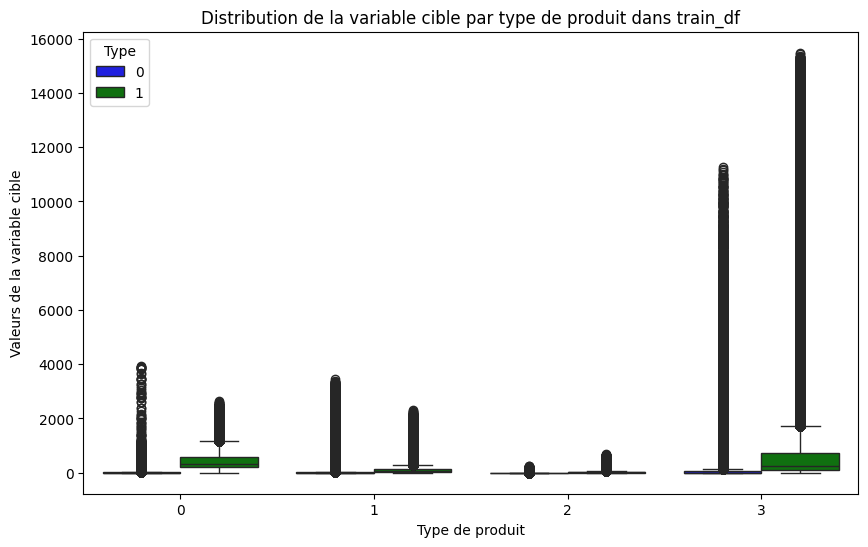

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='product_type', y='target', data=train_df, hue='is_consumption', palette=['blue', 'green'])
plt.title("Distribution de la variable cible par type de produit dans train_df")
plt.xlabel("Type de produit")
plt.ylabel("Valeurs de la variable cible")
plt.legend(title='Type')
plt.show()

In [37]:
print("Client Data:")
print(client_df.head())

Client Data:
   product_type  county  eic_count  installed_capacity  is_business  \
0             1       0        108              952.89            0   
1             2       0         17              166.40            0   
2             3       0        688             7207.88            0   
3             0       0          5              400.00            1   
4             1       0         43             1411.00            1   

         date  data_block_id  
0  2021-09-01              2  
1  2021-09-01              2  
2  2021-09-01              2  
3  2021-09-01              2  
4  2021-09-01              2  


In [38]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41919 entries, 0 to 41918
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_type        41919 non-null  int64  
 1   county              41919 non-null  int64  
 2   eic_count           41919 non-null  int64  
 3   installed_capacity  41919 non-null  float64
 4   is_business         41919 non-null  int64  
 5   date                41919 non-null  object 
 6   data_block_id       41919 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 2.2+ MB


In [39]:
client_df.describe()


,product_type,county,eic_count,installed_capacity,is_business,data_block_id
count,41919.000000,41919.000000,41919.000000,41919.000000,41919.000000,41919.000000
mean,1.898996,7.297097,73.345118,1450.771451,0.536773,322.898876
std,1.081713,4.780750,144.064389,2422.233120,0.498652,182.075724
min,0.000000,0.000000,5.000000,5.500000,0.000000,2.000000
25%,1.000000,3.000000,13.000000,321.900000,0.000000,167.000000
50%,2.000000,7.000000,32.000000,645.200000,1.000000,324.000000
75%,3.000000,11.000000,70.000000,1567.150000,1.000000,480.000000
max,3.000000,15.000000,1517.000000,19314.310000,1.000000,637.000000


In [40]:
client_df.isnull().sum()


product_type          0
county                0
eic_count             0
installed_capacity    0
is_business           0
date                  0
data_block_id         0
dtype: int64

In [42]:
duplicates_client = client_df[client_df.duplicated()]
client_df = client_df.drop_duplicates()
print(duplicates_client)

Empty DataFrame
Columns: [product_type, county, eic_count, installed_capacity, is_business, date, data_block_id]
Index: []


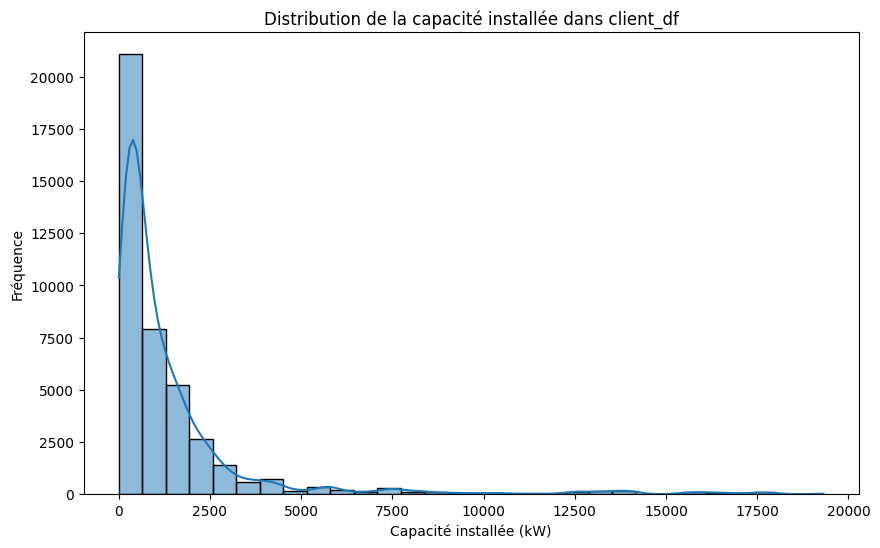

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(client_df['installed_capacity'], bins=30, kde=True)
plt.title("Distribution de la capacité installée dans client_df")
plt.xlabel("Capacité installée (kW)")
plt.ylabel("Fréquence")
plt.show()

In [45]:
electricity_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15286 entries, 0 to 15285
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   forecast_date  15286 non-null  object 
 1   euros_per_mwh  15286 non-null  float64
 2   origin_date    15286 non-null  object 
 3   data_block_id  15286 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 477.8+ KB


In [46]:
electricity_prices_df.describe()

,euros_per_mwh,data_block_id
count,15286.000000,15286.000000
mean,157.064176,318.990710
std,121.148625,183.890301
min,-10.060000,1.000000
25%,85.290000,160.000000
50%,128.280000,319.000000
75%,199.797500,478.000000
max,4000.000000,637.000000


In [47]:
electricity_prices_df.isnull().sum()


forecast_date    0
euros_per_mwh    0
origin_date      0
data_block_id    0
dtype: int64

In [48]:
duplicates_electricity_prices = electricity_prices_df[electricity_prices_df.duplicated()]
electricity_prices_df = electricity_prices_df.drop_duplicates()
print(duplicates_electricity_prices)

Empty DataFrame
Columns: [forecast_date, euros_per_mwh, origin_date, data_block_id]
Index: []


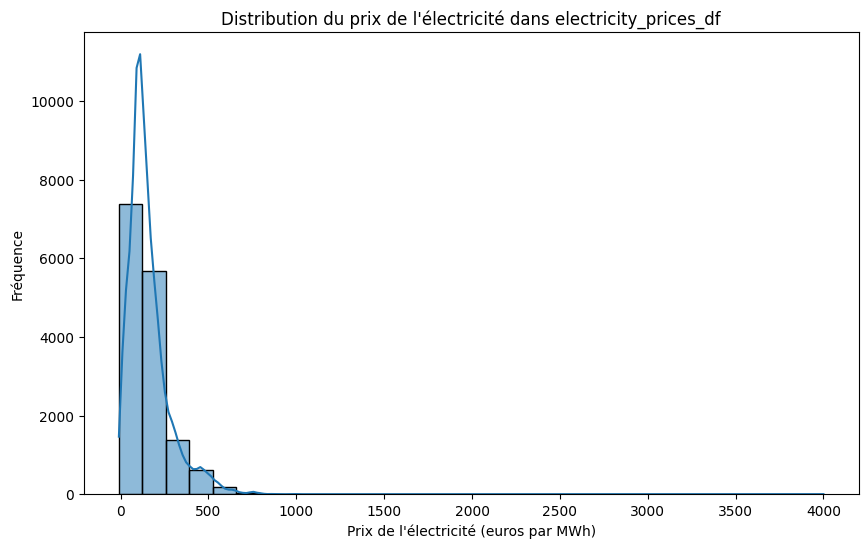

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(electricity_prices_df['euros_per_mwh'], bins=30, kde=True)
plt.title("Distribution du prix de l'électricité dans electricity_prices_df")
plt.xlabel("Prix de l'électricité (euros par MWh)")
plt.ylabel("Fréquence")
plt.show()

In [50]:
gas_prices_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   forecast_date          637 non-null    object 
 1   lowest_price_per_mwh   637 non-null    float64
 2   highest_price_per_mwh  637 non-null    float64
 3   origin_date            637 non-null    object 
 4   data_block_id          637 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 25.0+ KB


In [51]:
gas_prices_df.describe()


,lowest_price_per_mwh,highest_price_per_mwh,data_block_id
count,637.000000,637.000000,637.000000
mean,95.036750,107.754631,319.000000
std,47.552295,54.743666,184.030342
min,28.100000,34.000000,1.000000
25%,60.000000,67.530000,160.000000
50%,85.210000,93.470000,319.000000
75%,109.000000,130.740000,478.000000
max,250.000000,305.000000,637.000000


In [52]:
gas_prices_df.isnull().sum()

forecast_date            0
lowest_price_per_mwh     0
highest_price_per_mwh    0
origin_date              0
data_block_id            0
dtype: int64

In [53]:
duplicates_gas_prices = gas_prices_df[gas_prices_df.duplicated()]
gas_prices_df = gas_prices_df.drop_duplicates()
print(duplicates_gas_prices)

Empty DataFrame
Columns: [forecast_date, lowest_price_per_mwh, highest_price_per_mwh, origin_date, data_block_id]
Index: []


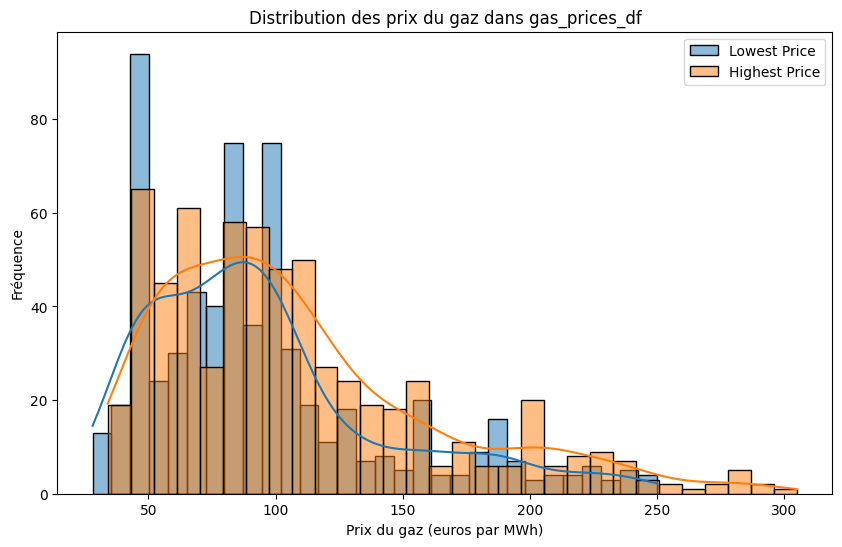

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(gas_prices_df['lowest_price_per_mwh'], bins=30, kde=True, label='Lowest Price')
sns.histplot(gas_prices_df['highest_price_per_mwh'], bins=30, kde=True, label='Highest Price')
plt.title("Distribution des prix du gaz dans gas_prices_df")
plt.xlabel("Prix du gaz (euros par MWh)")
plt.ylabel("Fréquence")
plt.legend()
plt.show()